In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
from matplotlib.animation import FuncAnimation
import time
from IPython.display import Image

# Random boolean network

In [ ]:
class RandomBooleanNetwork:
  def __init__(self, state , chart, rule):
    self.state = state
    self.chart = chart
    self.rule = rule
    self.nodes = len(self.state)

  def go(self,n):
    if len(state) != len(chart):
      print("Invalid chart size.")
      return
    if np.power(2,len(state)-1) != len(rule):
      print("Invalid rule size.")
      return
    states = []
    states.append(self.state)
    for t in np.arange(n):
      self.update()
      states.append(self.state)
      ## any other code to run each time
    # self.results(states)
    return np.array(states)

  def update(self):
    nextState = np.zeros(self.nodes)
    for node in np.arange(self.nodes):
      connected = chart[node]
      substate = np.zeros(self.nodes-1)
      for i in np.arange(len(connected)):
        substate[i] = self.state[connected[i]]
      for j in np.arange(len(connected), self.nodes-1):
        substate[j] = 0
      # print(node, substate)
      nextState[node] = self.rule[int("".join(str(int(x)) for x in substate), 2)]
    self.state = nextState


#  Script

In [ ]:
# Options
n = 50    # iterations
k = 6     # nodes
s = 0     # random seed

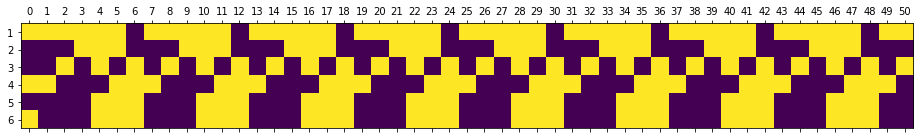

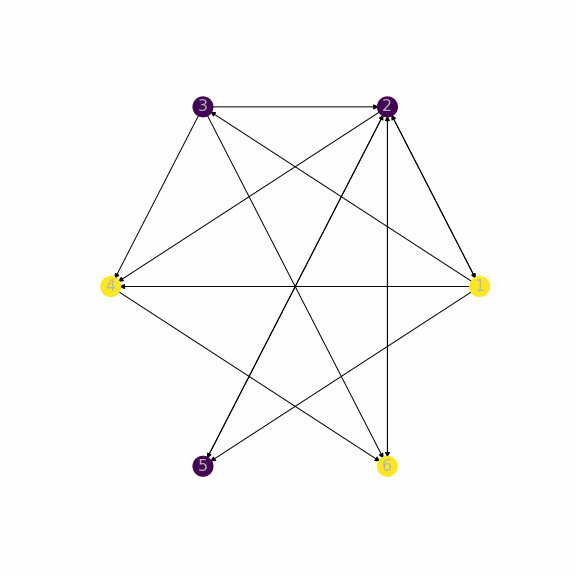

In [ ]:
np.random.seed(s)
np.random.seed(np.random.randint(1000000))

state = np.random.randint(2,size=k)
chart = []
for i in range(k):
  options = np.setdiff1d(range(k),[i],assume_unique=True)
  chart.append(np.random.choice(options,size=np.random.randint(1,k),replace=False))
rule = np.random.randint(2, size=np.power(2,len(state)-1))

p1 = RandomBooleanNetwork(state, chart, rule)
states = p1.go(n)

image = states.transpose()

row_labels = range(1,k+1)
col_labels = range(n+1)
plt.matshow(image)
plt.xticks(range(n+1), col_labels)
plt.yticks(range(k), row_labels)
timestamp = str(round(time.time()) % 1600000000)
plt.savefig('/content/drive/MyDrive/boolean_networks/tbl_'+timestamp+'.png')
plt.show()

# Generate a graph for each state using generated values and save animation
G = nx.MultiDiGraph()
G.add_nodes_from(range(k))

adjMat = []
for i in range(k): # row
  for j in range(k): # col
    if i != j and j in chart[i]:
      adjMat.append((i,j))

G.add_edges_from(adjMat)

pos = nx.circular_layout(G)
options = {"node_size": 400}
nodes = nx.draw_networkx_nodes(G,pos, **options)
edges = nx.draw_networkx_edges(G,pos)
labels = {}
for i in range(k):
  labels[i] = i+1
nx.draw_networkx_labels(G, pos, labels,font_size=16, font_color='#b7b7b5')
plt.axis('off')

def update(i):
    nc = states[i]
    nodes.set_array(nc)
    return nodes,

fig = plt.gcf()
fig.set_size_inches(8, 8)
ani = FuncAnimation(fig, update, interval=80, frames=range(n), blit=True)
loc = '/content/drive/MyDrive/boolean_networks/ani_'+timestamp+'.gif'
ani.save(loc, writer='pillow', savefig_kwargs={'facecolor':'white'}, fps=1)
plt.close()
Image(open(loc,'rb').read())